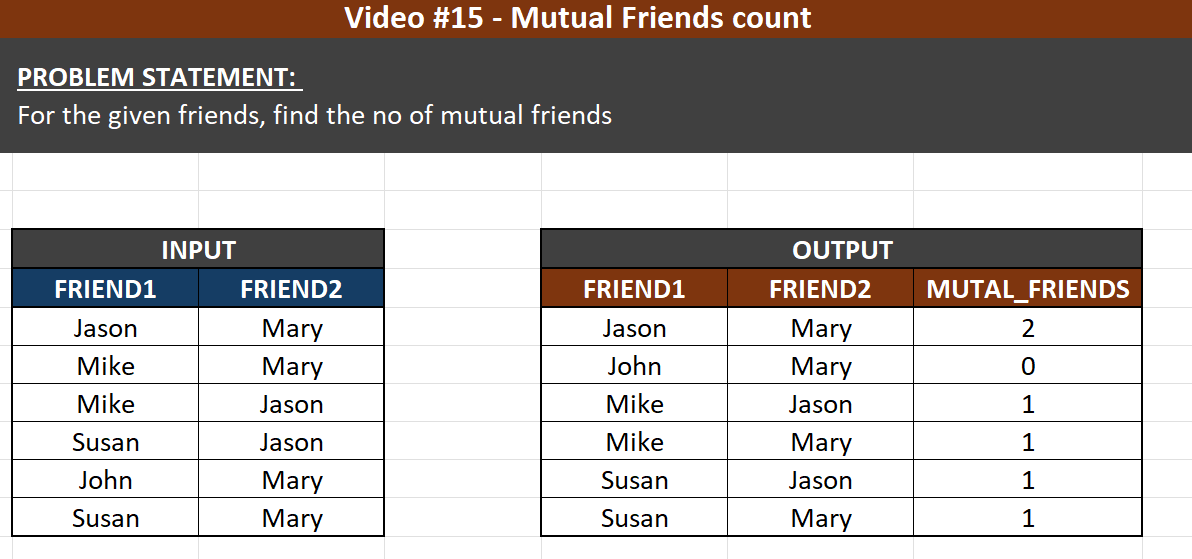

In [3]:
import pandas as pd

# Sample friendship data
data = {
    'FRIEND1': ['Jason', 'Mike', 'Mike', 'Susan', 'John', 'Susan'],
    'FRIEND2': ['Mary', 'Mary', 'Jason', 'Jason', 'Mary', 'Mary']
}

# Step 1: Create the DataFrame
friend_df = pd.DataFrame(data)

friend_df


,FRIEND1,FRIEND2
0,Jason,Mary
1,Mike,Mary
2,Mike,Jason
3,Susan,Jason
4,John,Mary
5,Susan,Mary


In [4]:
friendships = {}

for index, row in friend_df.iterrows():
    friend1 = row['FRIEND1']
    friend2 = row['FRIEND2']
    
    if friend1 not in friendships:
        friendships[friend1] = set()
    if friend2 not in friendships:
        friendships[friend2] = set()
    
    friendships[friend1].add(friend2)
    friendships[friend2].add(friend1)

friendships

{'Jason': {'Mary', 'Mike', 'Susan'},
 'Mary': {'Jason', 'John', 'Mike', 'Susan'},
 'Mike': {'Jason', 'Mary'},
 'Susan': {'Jason', 'Mary'},
 'John': {'Mary'}}

In [5]:
def mutual_friends_count(friend1, friend2):
    if friend1 in friendships and friend2 in friendships:
        mutual_friends = friendships[friend1].intersection(friendships[friend2])
        return len(mutual_friends)
    return 0  # Return 0 if either person is not found

# Step 4: Calculate mutual friends count for each row and add to DataFrame
friend_df['Mutual_Friends_Count'] = friend_df.apply(lambda row: mutual_friends_count(row['FRIEND1'], row['FRIEND2']), axis=1)

# Display the resulting DataFrame
print(friend_df)

  FRIEND1 FRIEND2  Mutual_Friends_Count
0   Jason    Mary                     2
1    Mike    Mary                     1
2    Mike   Jason                     1
3   Susan   Jason                     1
4    John    Mary                     0
5   Susan    Mary                     1
